In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Information about the data
info = pd.read_csv("./ml-100k/u.info", sep=" ", header=None)
info.columns=['Counts', 'Type']
info

,Counts,Type
0,943,users
1,1682,items
2,100000,ratings


In [3]:
#Types of genres
genre = pd.read_csv('./ml-100k/u.genre', sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [4]:
#Types of occupations
occupation = pd.read_csv('./ml-100k/u.occupation', sep="|", encoding='latin-1', header=None)
occupation.columns = ['Occupations']
occupation_list = list(occupation['Occupations'])
occupation_list

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

In [5]:
#Load the Ratings data
data = pd.read_csv('./ml-100k/u.data', sep="\t", header=None)
data.columns = ['user id', 'movie id', 'rating', 'timestamp']
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
data.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [7]:
data.shape

(100000, 4)

In [8]:
data['movie id'].unique().shape # Total number of movies is 1682 only

(1682,)

In [9]:
data.duplicated().value_counts()

False    100000
dtype: int64

In [10]:
#Load the Movies data
item = pd.read_csv('./ml-100k/u.item', sep="|", encoding='latin-1', header=None)
item.columns = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
item['release date'] = pd.to_datetime(item['release date'])

In [12]:
item['year'] = item['release date'].dt.year

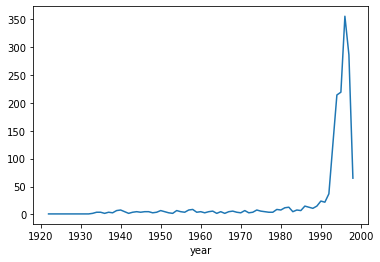

In [13]:
item.groupby('year')['movie id'].count().plot()

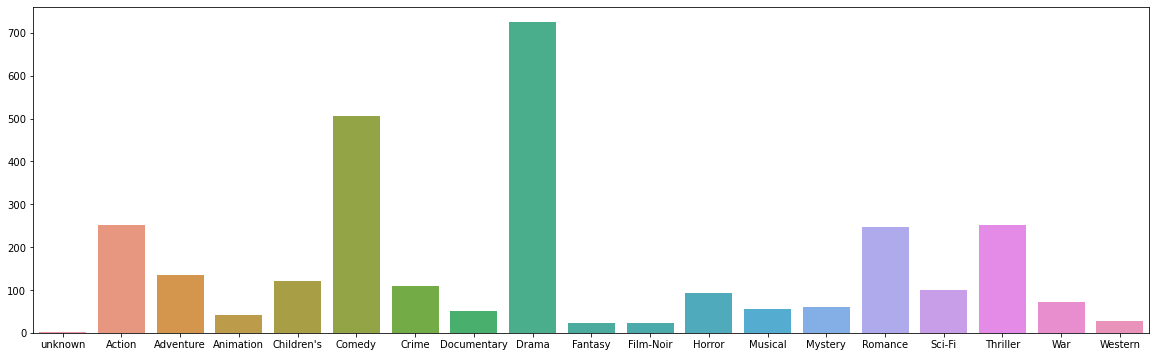

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
sns.barplot(x = item.loc[:,'unknown':'Western'].sum().index, y = item.loc[:,'unknown':'Western'].sum().values)

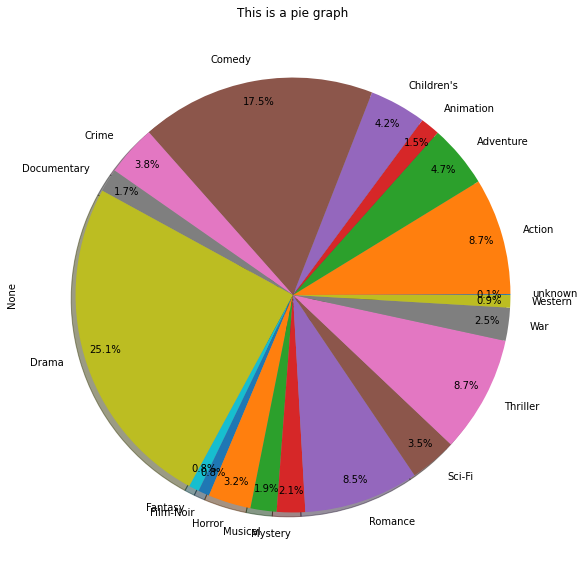

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
item.loc[:, 'unknown':'Western'].sum().plot.pie(autopct='%.1f%%', radius=1.0,pctdistance=0.9, shadow=True, labeldistance=1.1, title='This is a pie graph', textprops=dict(color="black"))

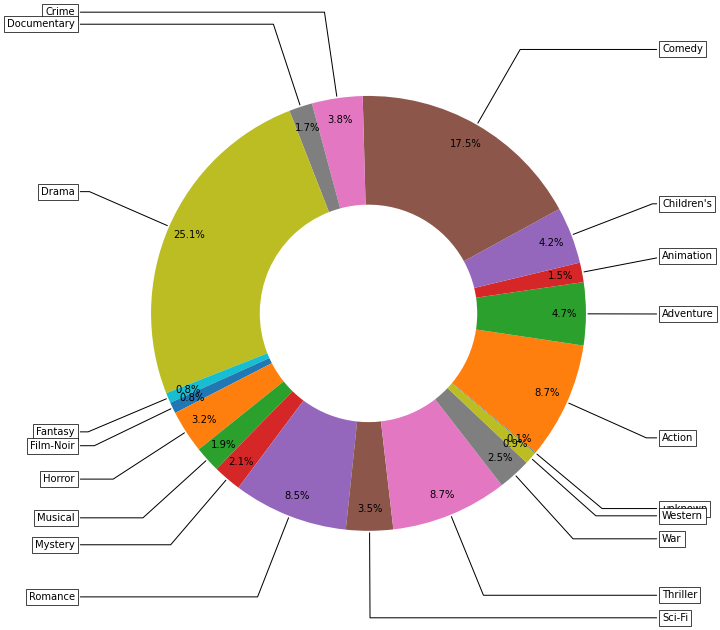

In [16]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

recipe = ['unknown', 'Action', 
                'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

dataframe = item.loc[:, 'unknown':'Western'].sum()

wedges, texts,_ = ax.pie(dataframe, wedgeprops=dict(width=0.5), startangle=-40, autopct='%.1f%%', pctdistance=0.9)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.style.use('seaborn-notebook')
#ax.set_title("Matplotlib bakery: A donut")
plt.show()

In [17]:
item['movie id'].unique().shape

(1682,)

In [18]:
item.isna().sum()

movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
year                     1
dtype: int64

In [19]:
#Load the User data
user = pd.read_csv('./ml-100k/u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
user.shape

(943, 5)

In [21]:
user.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [22]:
user.duplicated().value_counts()

False    943
dtype: int64

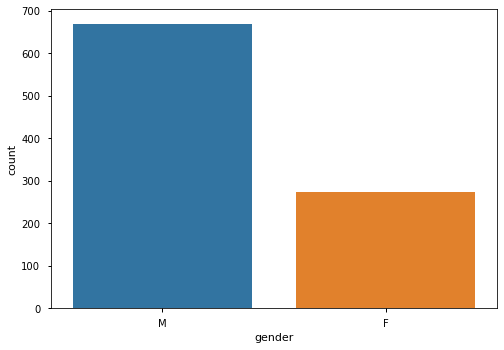

In [23]:
sns.countplot(data=user, x='gender')

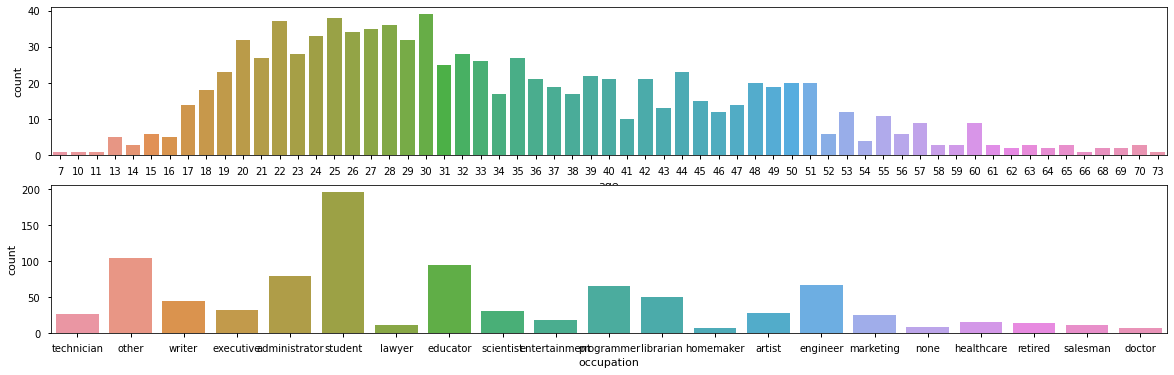

In [24]:
fig, ax = plt.subplots(2,1, figsize=(20,6))
sns.countplot(data=user, x='age', ax=ax[0])
sns.countplot(data=user, x='occupation', ax = ax[1])

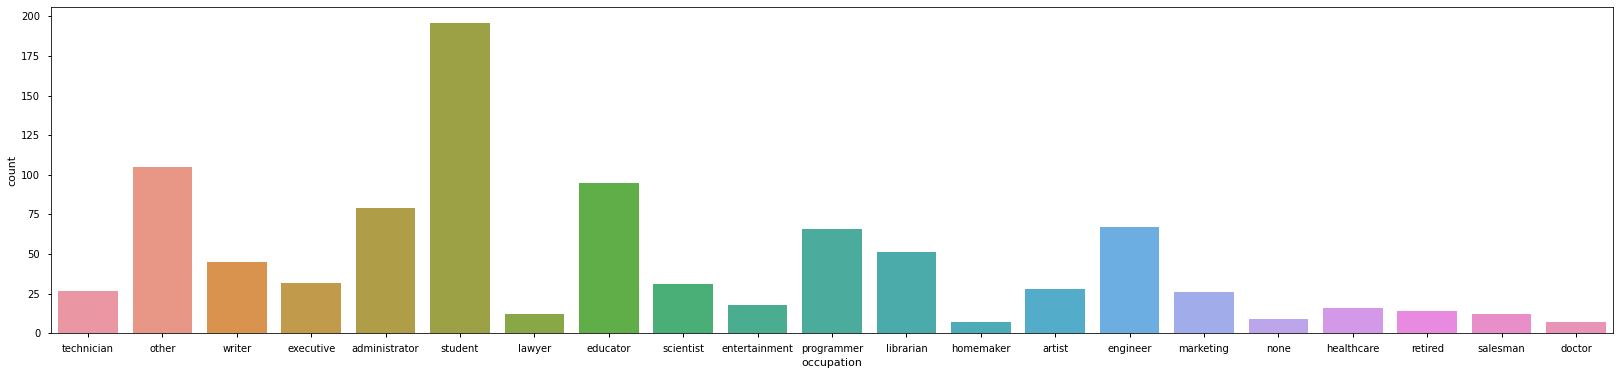

In [25]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
sns.countplot(data=user, x='occupation')

In [26]:
df_merged = pd.merge(data, item, on='movie id', how='left')
df_merged

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,186,302,3,891717742,L.A. Confidential (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,1,0,0,1997.0
2,22,377,1,878887116,Heavyweights (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,1994.0
3,244,51,2,880606923,Legends of the Fall (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,1,0,0,1,1,1994.0
4,166,346,1,886397596,Jackie Brown (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)",1996-09-14,NaN,http://us.imdb.com/M/title-exact?First%20Wives...,0,0,...,0,0,0,0,0,0,0,0,0,1996.0
99996,716,204,5,879795543,Back to the Future (1985),1985-01-01,NaN,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,0,...,0,0,0,0,0,1,0,0,0,1985.0
99997,276,1090,1,874795795,Sliver (1993),1993-01-01,NaN,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,0,...,0,0,0,0,0,0,1,0,0,1993.0
99998,13,225,2,882399156,101 Dalmatians (1996),1996-11-27,NaN,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,0,...,0,0,0,0,0,0,0,0,0,1996.0


In [27]:
df_merged.groupby('movie id').count().sort_values(by='user id', ascending=False)

,user id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movie id,,,,,,,,,,,,,,,,,,,,,
50,583,583,583,583,583,0,583,583,583,583,...,583,583,583,583,583,583,583,583,583,583
258,509,509,509,509,509,0,509,509,509,509,...,509,509,509,509,509,509,509,509,509,509
100,508,508,508,508,508,0,508,508,508,508,...,508,508,508,508,508,508,508,508,508,508
181,507,507,507,507,507,0,507,507,507,507,...,507,507,507,507,507,507,507,507,507,507
294,485,485,485,485,485,0,485,485,485,485,...,485,485,485,485,485,485,485,485,485,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1577,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1348,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [28]:
df_merged.head()

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,186,302,3,891717742,L.A. Confidential (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,1,0,0,1,0,0,1,0,0,1997.0
2,22,377,1,878887116,Heavyweights (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,1994.0
3,244,51,2,880606923,Legends of the Fall (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,1,0,0,1,1,1994.0
4,166,346,1,886397596,Jackie Brown (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,1997.0


In [29]:
df_merged.drop(df_merged.columns[[3,4,5,6,7]], axis=1)

,user id,movie id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,186,302,3,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1997.0
2,22,377,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1994.0
3,244,51,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1994.0
4,166,346,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1996.0
99996,716,204,5,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1985.0
99997,276,1090,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1993.0
99998,13,225,2,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1996.0


In [30]:
RatingMatrix=pd.pivot_table(df_merged, values='rating',
                                    index=['user id'], columns=['movie id'])
RatingMatrix.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(RatingMatrix.shape)
print(len(RatingMatrix))

(943, 1682)
943


In [32]:
df_merged.groupby('movie id')['user id'].count()

movie id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: user id, Length: 1682, dtype: int64

In [33]:
df_merged_2 = pd.merge(df_merged, user, on='user id', how='left')
df_merged_2.head()

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Romance,Sci-Fi,Thriller,War,Western,year,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya (1996),1997-01-24,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,1997.0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,0,1,0,0,1997.0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,1994.0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,1,0,0,1,1,1994.0,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),1997-01-01,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,1997.0,47,M,educator,55113


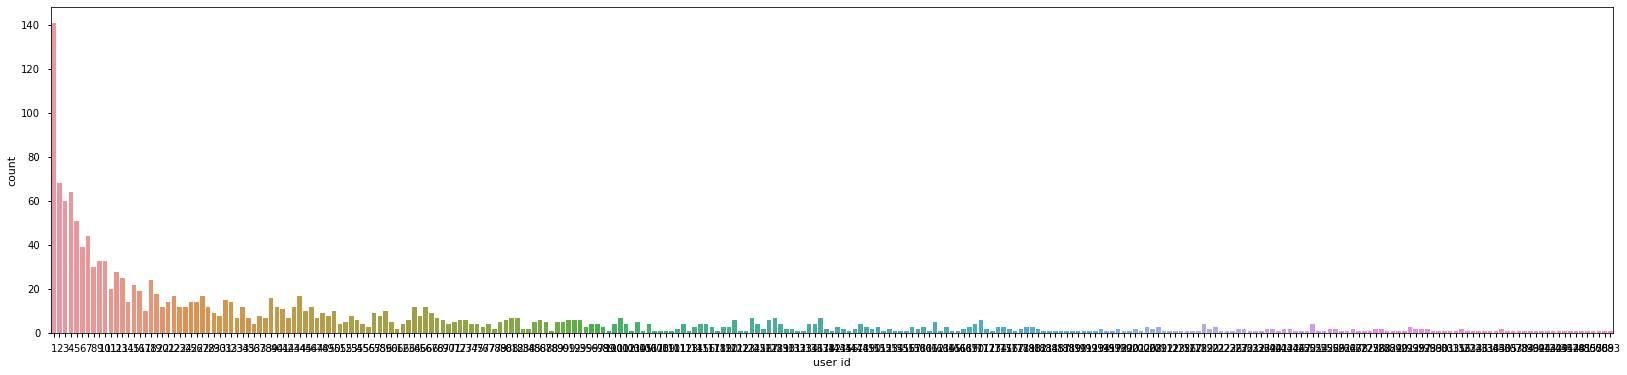

In [34]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
sns.countplot(df_merged.groupby('movie id')['user id'].count())

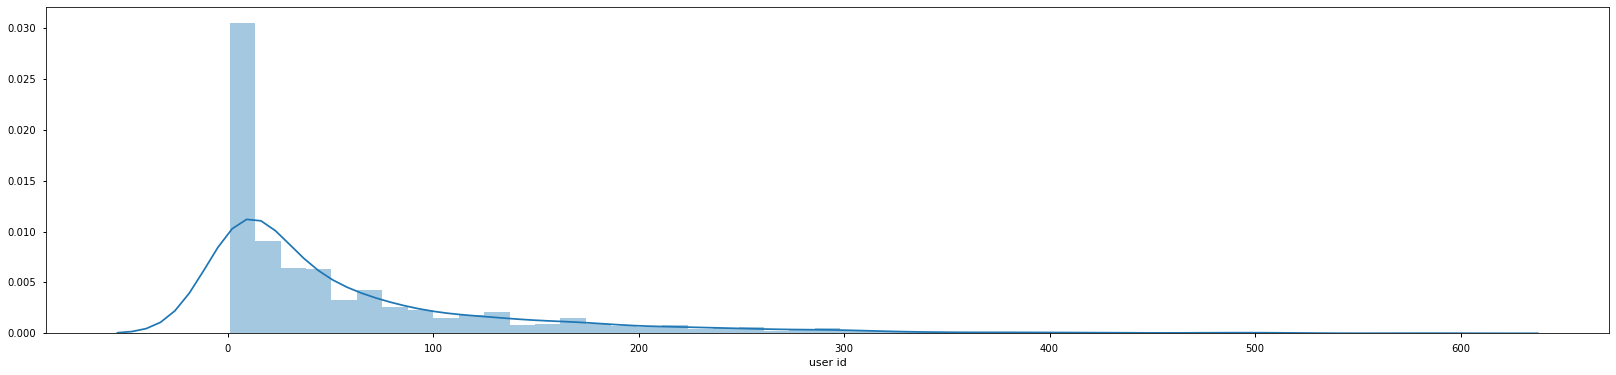

In [35]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
sns.distplot(df_merged.groupby('movie id')['user id'].count())

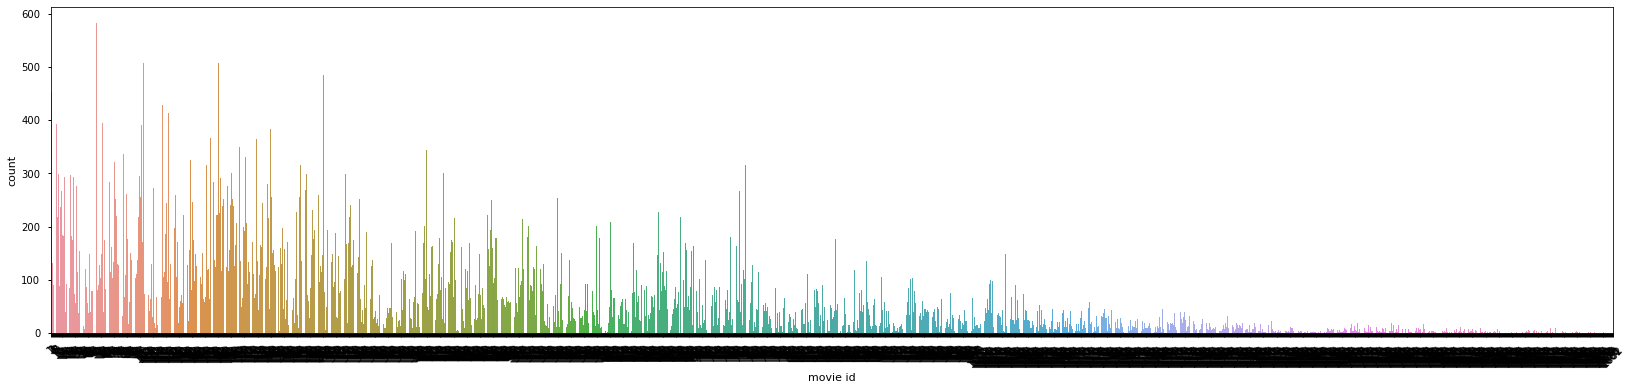

In [36]:
fig, ax = plt.subplots(1,1, figsize=(28,6))
plt.xticks(rotation=45)
sns.countplot(data=df_merged, x='movie id')

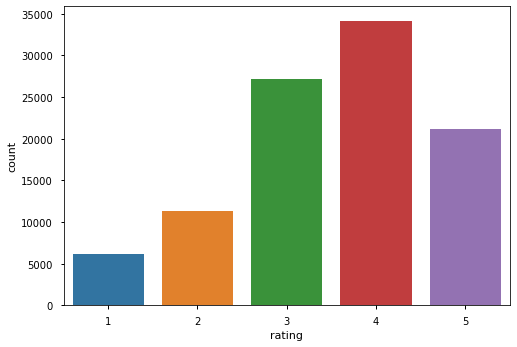

In [37]:
sns.countplot(data=df_merged, x='rating')

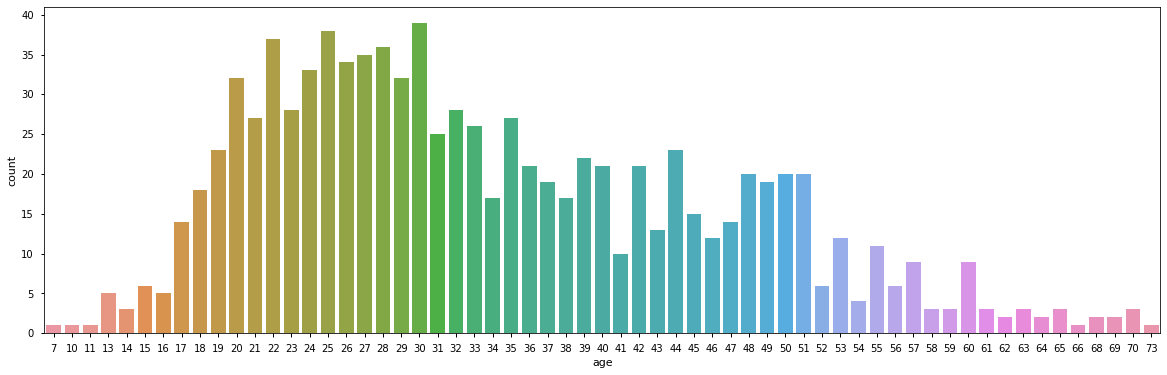

In [38]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
sns.countplot(data=user, x='age')

# Content based recommendation

In [39]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.spatial.distance import correlation
from scipy.spatial.distance import hamming
from sklearn.preprocessing import normalize
from keras.preprocessing import image
import matplotlib.gridspec as gridspec

Using TensorFlow backend.
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\envs\FTDS\lib\site-packages\t

In [40]:
df_genre = df_merged[['movie id', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
df_genre = df_genre.groupby('movie id').sum()
df_genre_norm = pd.DataFrame(normalize(df_genre, axis=0))
df_genre_norm.columns = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_genre_norm.index = df_genre.index
df_genre_norm

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.585647,0.434579,0.214216,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.055258,0.075551,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.064058,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.044010,0.0,0.0
4,0.0,0.088159,0.000000,0.000000,0.000000,0.099051,0.000000,0.0,0.080994,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.069007,0.0,0.033328,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.042054,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000388,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1679,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.000489,0.0,0.0
1680,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000388,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.000000,0.0,0.0


In [41]:
df_title = item[['movie id', 'movie title']]
df_title = df_title.set_index('movie id')
df_title

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
...,...
1678,Mat' i syn (1997)
1679,B. Monkey (1998)
1680,Sliding Doors (1998)


In [42]:
def movie_recommender(distance_method, movie_id, user_id, N):
    # create dataframe used to store distances between recipes
    allMovies = pd.DataFrame(df_genre_norm.index)
    
    allMovies = allMovies[allMovies['movie id'] != movie_id]
    
    allMovies["distance"] = allMovies['movie id'].apply(lambda x: distance_method(df_genre_norm.loc[movie_id], df_genre_norm.loc[x]))
    #print(allMovies['distance'])
    
    TopNRecommendation = allMovies.sort_values(["distance"])#.head(N)
    print(f"Before remove viewed movied:\n {TopNRecommendation}")
   
    viewed_movies = df_merged[df_merged['user id'] == user_id]['movie id'].values
    print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")
    
    TopNRecommendation = TopNRecommendation[~TopNRecommendation['movie id'].isin(viewed_movies)]  # Using ~ means .notin (Don't have this command, so use conditional operation)
    print(f"After remove viewed movied:\n {TopNRecommendation}")
    
    TopNRecommendation = allMovies.sort_values(["distance"]).head(N)
    
    for recipeid in TopNRecommendation['movie id']:
        print(recipeid)
   
    #return TopNRecommendation
    return df_genre_norm.loc[TopNRecommendation['movie id']]

In [43]:
print("Recommended Movies: ")
result = movie_recommender(euclidean, 1680, 186, 3)
result

Recommended Movies: 
Before remove viewed movied:
       movie id  distance
1492      1493  0.000388
1562      1563  0.000388
1339      1340  0.000388
1579      1580  0.000388
1525      1526  0.000489
...        ...       ...
301        302  0.707667
49          50  0.714160
0            1  0.760086
422        423  0.766825
266        267  0.993884

[1681 rows x 2 columns]
viewed movies are:
 [ 302  566  250  148  263  470  983  281  385  588  406  925  977  322
   53  333  591  742  770  550  237 1277 1253   71  554  257   44  117
  327  288  225  988   31  939  546  100  338  717  118  226  300  299
  596   95  243 1016   79  306  106  829  934 1399  754  595  121  568
  303  332  540 1046   98   56  880  203 1336 1083  291  356  684   38
  477  258  298  820 1033  887  330  689  159   12   55  294 1213 1042
  177 1385  331   77  405  147  295  269]
(92,)
After remove viewed movied:
       movie id  distance
1492      1493  0.000388
1562      1563  0.000388
1339      1340  0.000388
1

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.0,0.0,0.0
1340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000512,0.0,0.0,0.0,0.0


# Collaborative Recommendation

In [44]:
RatingMatrix=pd.pivot_table(df_merged, values='rating',
                                    index=['user id'], columns=['movie id'])
RatingMatrix.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print(RatingMatrix.shape)
print(len(RatingMatrix))

(943, 1682)
943


In [46]:
RatingMatrix.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user id', length=943)

In [47]:
# To Find the k nearest neighbours of active user first find the distance of active user to all other users
def nearestneighbours(df, distance_method, user,K):
    # create a user df that contains all users except active user
    allUsers = pd.DataFrame(df.index)
    allUsers = allUsers[allUsers['user id'] != user]
    #print(allUsers)
    
    # Add a column to this df which contains distance of active user to each user
    allUsers["distance"] = allUsers["user id"].apply(lambda x: distance_method(df.loc[user],df.loc[x]))
    KnearestUsers = allUsers.sort_values(["distance"],ascending=True)[["user id", "distance"]][:K]
    return KnearestUsers

In [48]:
print(nearestneighbours(RatingMatrix, hamming, 186, 5))
x = nearestneighbours(RatingMatrix, hamming, 186, 5)

     user id  distance
129      130  0.985731
795      796  0.989298
312      313  0.989298
550      551  0.989893
346      347  0.989893


In [49]:
# To be finished, movies to be recommended under collaborative recommendation

def topN(df, distance_method, user, N=5):
    KnearestUsers = nearestneighbours(df, distance_method, user, N)
    #print(KnearestUsers)
    print(df[df.index.isin(KnearestUsers)].shape)
    
    NNRatings = df.iloc[df.index.isin(KnearestUsers)]
    #print(f" NNRating: {NNRatings}")
    
    avgRating = NNRatings
    
    viewed_movies = df.loc[user].dropna().index
    print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")
    
    avgRating = avgRating[~avgRating['movie id'].isin(viewed_movies)]
    print(avgRating)
    topNISBNs = avgRating.sort_values(ascending=False).index[:N]
    
    return topNISBNs

In [50]:
NNRatings = df_merged[df_merged['user id'].isin(x['user id'].values)]['movie id']
type(NNRatings)

pandas.core.series.Series

In [51]:
viewed_movies = df_merged[df_merged['user id'] == 186]['movie id'].values
viewed_movies

array([ 302,  566,  250,  148,  263,  470,  983,  281,  385,  588,  406,
        925,  977,  322,   53,  333,  591,  742,  770,  550,  237, 1277,
       1253,   71,  554,  257,   44,  117,  327,  288,  225,  988,   31,
        939,  546,  100,  338,  717,  118,  226,  300,  299,  596,   95,
        243, 1016,   79,  306,  106,  829,  934, 1399,  754,  595,  121,
        568,  303,  332,  540, 1046,   98,   56,  880,  203, 1336, 1083,
        291,  356,  684,   38,  477,  258,  298,  820, 1033,  887,  330,
        689,  159,   12,   55,  294, 1213, 1042,  177, 1385,  331,   77,
        405,  147,  295,  269], dtype=int64)

In [52]:
pd.Series(viewed_movies)

0     302
1     566
2     250
3     148
4     263
     ... 
87     77
88    405
89    147
90    295
91    269
Length: 92, dtype: int64

In [53]:
avgRating = NNRatings
avgRating = avgRating[~avgRating.isin(pd.Series(viewed_movies))]
avgRating

194       379
199       216
290      1014
385      1017
527       109
         ... 
99299    1291
99408     926
99526     427
99932     824
99950      93
Name: movie id, Length: 1264, dtype: int64

In [54]:
topN(RatingMatrix, hamming, 186, 5)

(0, 1682)
viewed movies are:
 Int64Index([  12,   31,   38,   44,   53,   55,   56,   71,   77,   79,   95,
              98,  100,  106,  117,  118,  121,  147,  148,  159,  177,  203,
             225,  226,  237,  243,  250,  257,  258,  263,  269,  281,  288,
             291,  294,  295,  298,  299,  300,  302,  303,  306,  322,  327,
             330,  331,  332,  333,  338,  356,  385,  405,  406,  470,  477,
             540,  546,  550,  554,  566,  568,  588,  591,  595,  596,  684,
             689,  717,  742,  754,  770,  820,  829,  880,  887,  925,  934,
             939,  977,  983,  988, 1016, 1033, 1042, 1046, 1083, 1213, 1253,
            1277, 1336, 1385, 1399],
           dtype='int64', name='movie id')
(92,)


KeyError: 'movie id'

In [ ]:
viewed_movies = df_merged[df_merged['user id'] == 186]['movie id'].values
print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")

In [ ]:
RatingMatrix_norm = RatingMatrix.fillna(1)
RatingMatrix_norm = pd.DataFrame(normalize(RatingMatrix_norm, axis=0))
RatingMatrix_norm.columns = RatingMatrix.columns
RatingMatrix_norm.index = RatingMatrix.index
RatingMatrix_norm

In [ ]:
print(nearestneighbours(RatingMatrix_norm, euclidean, 186, 5))

In [ ]:
pd.set_option("display.max_columns", 10000)
RatingMatrix_norm[RatingMatrix_norm.index.isin([186,130,796,155,431])].sum(axis=1)

In [ ]:
print(nearestneighbours(RatingMatrix_norm, correlation, 186, 5))

In [ ]:
pd.set_option("display.max_columns", 10000)
RatingMatrix_norm[RatingMatrix_norm.index.isin([186,332,431,633])].sum(axis=1)

# Matrix Factorization

In [55]:
df_merged_2 = df_merged_2.drop(df_merged.columns[[3,4,5,6,7]], axis=1)
df_merged_2 = df_merged_2.drop('zip code', axis=1)
df_merged_2 = df_merged_2.drop('year', axis=1)
df_merged_2

,user id,movie id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation
0,196,242,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,49,M,writer
1,186,302,3,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,39,F,executive
2,22,377,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,25,M,writer
3,244,51,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,28,M,technician
4,166,346,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,47,M,educator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,13,M,student
99996,716,204,5,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,36,F,administrator
99997,276,1090,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,21,M,student
99998,13,225,2,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,47,M,educator


In [60]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.reader import Reader


# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9282  0.9344  0.9409  0.9365  0.9386  0.9357  0.0043  
MAE (testset)     0.7305  0.7361  0.7413  0.7381  0.7418  0.7376  0.0041  
Fit time          4.54    4.57    4.77    4.83    4.63    4.67    0.11    
Test time         0.12    0.13    0.14    0.13    0.13    0.13    0.01    


{'test_rmse': array([0.92818769, 0.9344375 , 0.94094068, 0.93647708, 0.93858626]),
 'test_mae': array([0.73053589, 0.73607162, 0.74133505, 0.73811156, 0.74177179]),
 'fit_time': (4.539866209030151,
  4.569421768188477,
  4.7704997062683105,
  4.832104682922363,
  4.632827043533325),
 'test_time': (0.11988329887390137,
  0.13465118408203125,
  0.1407606601715088,
  0.12900662422180176,
  0.12670111656188965)}

In [57]:
type(data)

surprise.dataset.DatasetAutoFolds

In [58]:
df_dataset = df_merged[['movie id', 'user id', 'rating']]
df_dataset.head()

,movie id,user id,rating
0,242,196,3
1,302,186,3
2,377,22,1
3,51,244,2
4,346,166,1


In [61]:
# We'll use the famous SVD algorithm.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_dataset, reader)
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9491  0.9353  0.9295  0.9341  0.9338  0.9364  0.0067  
MAE (testset)     0.7470  0.7371  0.7330  0.7339  0.7389  0.7380  0.0050  
Fit time          5.01    4.70    4.77    4.71    4.65    4.77    0.13    
Test time         0.13    0.33    0.14    0.14    0.12    0.17    0.08    


{'test_rmse': array([0.94914649, 0.93526064, 0.92945466, 0.93414639, 0.93376516]),
 'test_mae': array([0.74696193, 0.73714047, 0.73296031, 0.7338925 , 0.73885639]),
 'fit_time': (5.009799480438232,
  4.703409910202026,
  4.766823768615723,
  4.707810163497925,
  4.654345512390137),
 'test_time': (0.12995576858520508,
  0.33389997482299805,
  0.1378321647644043,
  0.13905096054077148,
  0.12303924560546875)}

In [62]:
result = []
for i in range(1,1683):
    pred = algo.predict(186, i)
    result.append(pred)

In [63]:
result[0:10]

[Prediction(uid=186, iid=1, r_ui=None, est=3.984504971270258, details={'was_impossible': False}),
 Prediction(uid=186, iid=2, r_ui=None, est=4.059231140875619, details={'was_impossible': False}),
 Prediction(uid=186, iid=3, r_ui=None, est=3.6233834478169937, details={'was_impossible': False}),
 Prediction(uid=186, iid=4, r_ui=None, est=4.542824321267597, details={'was_impossible': False}),
 Prediction(uid=186, iid=5, r_ui=None, est=4.167916304466728, details={'was_impossible': False}),
 Prediction(uid=186, iid=6, r_ui=None, est=3.2189595396076562, details={'was_impossible': False}),
 Prediction(uid=186, iid=7, r_ui=None, est=4.444352070887175, details={'was_impossible': False}),
 Prediction(uid=186, iid=8, r_ui=None, est=3.8647206282308413, details={'was_impossible': False}),
 Prediction(uid=186, iid=9, r_ui=None, est=4.439114712807353, details={'was_impossible': False}),
 Prediction(uid=186, iid=10, r_ui=None, est=4.351498992488247, details={'was_impossible': False})]

In [64]:
for a,b,c,d,e in result:
    print(b,d)

1 3.984504971270258
2 4.059231140875619
3 3.6233834478169937
4 4.542824321267597
5 4.167916304466728
6 3.2189595396076562
7 4.444352070887175
8 3.8647206282308413
9 4.439114712807353
10 4.351498992488247
11 3.5596424650714193
12 4.504993060276307
13 3.965052472711711
14 3.9795359815260034
15 3.6081962974218125
16 4.608334657068713
17 3.3259220971002046
18 3.509335921770392
19 3.816407620457519
20 3.513296414335178
21 3.8107054056671252
22 4.352527013795017
23 3.6591329847378025
24 4.279696617432896
25 4.0547877231837575
26 3.6574167419913204
27 3.65607313791768
28 4.0558290087173265
29 3.7905906789786754
30 4.296103460673187
31 4.004406371260561
32 3.712784577715185
33 4.13188271335359
34 4.51120405862667
35 3.878603188512764
36 4.247593642092037
37 4.413733779360067
38 4.079741773261239
39 4.281540515057186
40 3.336305853976963
41 3.9140715628173113
42 4.059978605738113
43 4.2157438533649065
44 4.1723194685412075
45 4.14266048337327
46 4.450976261680292
47 3.95179707282537
48 4.121131

753 3.785250251388612
754 4.059745459514044
755 3.6182082951208607
756 3.551836431412783
757 3.801354473161067
758 4.344739346418992
759 4.72873652662614
760 3.595929200362987
761 3.5790093583733418
762 3.376904818350713
763 3.8424426237596605
764 3.971270708203053
765 4.183336987677191
766 3.320475936238907
767 4.488872507728446
768 3.664063712747848
769 3.8543121619433913
770 4.605704075765978
771 3.5770333884715817
772 4.477450022035476
773 3.271182141180512
774 2.4500067381558392
775 4.036225992410257
776 4.3591824304649
777 4.068003331763532
778 3.4663834493400425
779 4.307887766961393
780 3.893206759059911
781 3.854529640014425
782 3.4246091047992175
783 4.5466743357448305
784 4.279400137642731
785 3.931164536784308
786 4.0480931855969455
787 3.9070627462800265
788 3.4891229964651296
789 4.435804084138675
790 3.6829856507495484
791 4.323754334594763
792 3.5380686560280807
793 4.119193857230293
794 4.2964584405930495
795 3.3196714763339195
796 4.473638279490465
797 3.2813983156205

In [65]:
# ===========================================

In [66]:
from collections import defaultdict
from surprise import SVD
from surprise import Dataset

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    #print(f"1.\n {top_n}")

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    #print(f"2.\n {top_n}")

    return top_n

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_dataset, reader)
#data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

In [67]:
top_n

defaultdict(list,
            {242: [(118, 5),
              (274, 5),
              (4, 5),
              (324, 5),
              (341, 5),
              (477, 5),
              (507, 5),
              (519, 5),
              (688, 5),
              (849, 5)],
             302: [(242, 5),
              (59, 5),
              (137, 5),
              (118, 5),
              (274, 5),
              (261, 5),
              (324, 5),
              (355, 5),
              (372, 5),
              (440, 5)],
             377: [(688, 4.2407023391273135),
              (507, 3.988208490675533),
              (152, 3.9548444513841323),
              (477, 3.9411819540297803),
              (907, 3.8873725200544347),
              (628, 3.88480151755241),
              (118, 3.831706334215055),
              (939, 3.8033561773973665),
              (523, 3.761861227508409),
              (427, 3.7354209054644403)],
             51: [(688, 4.778636010533981),
              (477, 4.625906083142649)

In [70]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    #if uid == '196':
        print(uid, [iid for (iid, _) in user_ratings])

242 [118, 274, 4, 324, 341, 477, 507, 519, 688, 849]
302 [242, 59, 137, 118, 274, 261, 324, 355, 372, 440]
377 [688, 507, 152, 477, 907, 628, 118, 939, 523, 427]
51 [688, 477, 507, 928, 427, 810, 261, 4, 907, 628]
346 [372, 688, 507, 89, 477, 472, 849, 118, 4, 928]
474 [295, 270, 180, 34, 261, 324, 367, 372, 427, 472]
265 [357, 507, 628, 688, 849, 907, 152, 939, 489, 923]
465 [507, 688, 907, 427, 551, 928, 810, 477, 118, 770]
451 [507, 489, 907, 628, 939, 849, 688, 270, 534, 9]
86 [118, 324, 427, 507, 688, 810, 4, 939, 477, 534]
257 [688, 477, 907, 519, 427, 849, 495, 565, 357, 173]
1014 [507, 688, 810, 849, 427, 939, 534, 477, 372, 628]
222 [849, 427, 810, 366, 372, 599, 261, 388, 330, 469]
40 [688, 507, 628, 810, 477, 534, 366, 256, 118, 270]
29 [688, 507, 907, 849, 372, 330, 887, 628, 427, 351]
785 [688, 507, 810, 366, 477, 261, 849, 118, 372, 928]
387 [507, 472, 928, 688, 907, 810, 372, 519, 130, 330]
274 [688, 507, 472, 427, 628, 810, 849, 137, 519, 330]
1042 [507, 849, 688, 427, 

895 [688, 427, 907, 849, 628, 939, 850, 923, 330, 534]
1149 [372, 427, 507, 688, 810, 849, 628, 324, 472, 887]
567 [507, 907, 427, 477, 688, 849, 118, 939, 628, 127]
606 [332, 427, 472, 507, 519, 688, 770, 810, 849, 366]
816 [688, 507, 907, 324, 810, 477, 849, 427, 523, 628]
672 [688, 324, 507, 477, 770, 810, 849, 4, 628, 907]
584 [688, 507, 372, 849, 770, 519, 427, 324, 118, 928]
521 [270, 507, 519, 688, 849, 427, 477, 928, 260, 546]
728 [688, 507, 907, 270, 477, 534, 261, 427, 330, 928]
689 [688, 849, 427, 357, 330, 862, 477, 270, 810, 152]
329 [507, 270, 928, 472, 261, 427, 330, 477, 324, 907]
859 [507, 688, 427, 939, 628, 907, 534, 477, 118, 810]
456 [688, 427, 507, 907, 270, 849, 330, 644, 628, 477]
791 [688, 427, 507, 849, 628, 372, 810, 38, 770, 118]
159 [507, 688, 366, 477, 152, 628, 907, 928, 849, 357]
489 [152, 324, 372, 366, 427, 477, 507, 688, 810, 849]
1266 [628, 688, 507, 849, 137, 907, 810, 118, 534, 34]
1416 [507, 688, 628, 427, 907, 849, 477, 472, 372, 357]
988 [507, 6

# Read imdb csv

In [271]:
df_imdb = pd.read_csv('imdb_new.csv')

In [272]:
df_imdb = df_imdb.rename(columns={"Unnamed: 0":"movie_id"})

In [273]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [274]:
df_imdb['genre'].isna().value_counts()

False    5208
Name: genre, dtype: int64

In [275]:
df_imdb['genre'] = df_imdb['genre'].apply(lambda x: x.replace(" ",""))

In [276]:
df_imdb['genre'] = df_imdb['genre'].apply(lambda x: x.split(sep=','))
df_imdb.head()

,movie_id,title,year,genre,rating,director,actors,votes,url
0,0,The Dark Knight,2008,"[Action, Crime, Drama]",9.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2222222.0,https://www.imdb.com/title/tt0468569/?ref_=adv...
1,1,The Mountain II,2016,"[Action, Drama, War]",8.9,Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu T?rkpen?e...",103623.0,https://www.imdb.com/title/tt5813916/?ref_=adv...
2,2,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",1978620.0,https://www.imdb.com/title/tt1375666/?ref_=adv...
3,3,The Lord of the Rings: The Fellowship of the Ring,2001,"[Action, Adventure, Drama]",8.8,Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",1606922.0,https://www.imdb.com/title/tt0120737/?ref_=adv...
4,4,The Matrix,1999,"[Action, Sci-Fi]",8.7,"Lana Wachowski, Lilly Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",1617768.0,https://www.imdb.com/title/tt0133093/?ref_=adv...


In [277]:
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn.preprocessing import Binarizer
mlb = MultiLabelBinarizer()

In [278]:
df_imdb_genres = pd.DataFrame(mlb.fit_transform(df_imdb['genre']), columns=mlb.classes_)

In [279]:
df_imdb = pd.concat([df_imdb, df_imdb_genres], axis=1)

In [280]:
df_imdb = df_imdb.drop('genre', axis=1)

In [281]:
df_imdb['title'].duplicated().value_counts()

False    2688
True     2520
Name: title, dtype: int64

In [282]:
df_imdb = df_imdb.drop_duplicates('title')

In [283]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2688 entries, 0 to 5207
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie_id   2688 non-null   int64  
 1   title      2688 non-null   object 
 2   year       2688 non-null   int64  
 3   rating     2687 non-null   float64
 4   director   2688 non-null   object 
 5   actors     2688 non-null   object 
 6   votes      2681 non-null   float64
 7   url        2688 non-null   object 
 8   Action     2688 non-null   int32  
 9   Adventure  2688 non-null   int32  
 10  Animation  2688 non-null   int32  
 11  Biography  2688 non-null   int32  
 12  Comedy     2688 non-null   int32  
 13  Crime      2688 non-null   int32  
 14  Drama      2688 non-null   int32  
 15  Family     2688 non-null   int32  
 16  Fantasy    2688 non-null   int32  
 17  Film-Noir  2688 non-null   int32  
 18  History    2688 non-null   int32  
 19  Horror     2688 non-null   int32  
 20  Music   

In [254]:
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-
#========-------==============-==--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--==-=-=--==-=-=--==-=-=--==-=--==-

In [284]:
df_imdb_final = df_imdb[['movie_id', "Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery", "Romance", "Sci-Fi", "Sport", "Thriller", "War", "Western"]]
df_imdb_final = df_imdb_final.groupby('movie_id').sum()
df_imdb_final_norm = pd.DataFrame(normalize(df_imdb_final, axis=0))
df_imdb_final_norm.columns = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Film-Noir", "History", "Horror", "Music", "Musical", "Mystery", "Romance", "Sci-Fi", "Sport", "Thriller", "War", "Western"]
df_imdb_final_norm.index = df_imdb_final.index
df_imdb_final_norm

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
0,0.040859,0.000000,0.0,0.0,0.000000,0.045222,0.024868,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.040859,0.000000,0.0,0.0,0.000000,0.000000,0.024868,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.104828,0.000000
2,0.040859,0.039841,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063758,0.0,0.0,0.000000,0.000000
3,0.040859,0.039841,0.0,0.0,0.000000,0.000000,0.024868,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.040859,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063758,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,0.040859,0.000000,0.0,0.0,0.035601,0.045222,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
5204,0.040859,0.039841,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
5205,0.040859,0.000000,0.0,0.0,0.035601,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063758,0.0,0.0,0.000000,0.000000


In [258]:
df_imdb_title = df_imdb[['movie_id', 'title']]
df_imdb_title = df_imdb_title.set_index('movie_id')
df_imdb_title

,title
movie_id,
0,The Dark Knight
1,The Mountain II
2,Inception
3,The Lord of the Rings: The Fellowship of the Ring
4,The Matrix
...,...
5203,Bandidas
5204,The Dark Tower
5205,Wild Wild West


In [339]:
def movie_recommender(distance_method, movie_name, N):
    # create dataframe used to store distances between recipes
    movie_id = df_imdb[df_imdb['title'] == movie_name]['movie_id'].item()
    
    allMovies = pd.DataFrame(df_imdb_final_norm.index)
    
    allMovies = allMovies[allMovies['movie_id'] != movie_id]
    
    allMovies["distance"] = allMovies['movie_id'].apply(lambda x: distance_method(df_imdb_final_norm.loc[movie_id], df_imdb_final_norm.loc[x]))
    #print(allMovies['distance'])
    
    TopNRecommendation = allMovies.sort_values(["distance"]).head(N)
    #print(f"Before remove viewed movied:\n {TopNRecommendation}")
   
    #### viewed_movies = df_merged[df_merged['user_id'] == user_id]['movie_id'].values
    #### print(f"viewed movies are:\n {viewed_movies}\n{viewed_movies.shape}")
    #### 
    #### TopNRecommendation = TopNRecommendation[~TopNRecommendation['movie_id'].isin(viewed_movies)]  # Using ~ means .notin (Don't have this command, so use conditional operation)
    #### print(f"After remove viewed movied:\n {TopNRecommendation}")
    #### 
    #### TopNRecommendation = allMovies.sort_values(["distance"]).head(N)
    
    for recipeid in TopNRecommendation['movie_id']:
        print(recipeid)
   
    #return TopNRecommendation
    return df_imdb_final_norm.loc[TopNRecommendation['movie_id']]

In [341]:
print("Recommended Movies: ")
result = movie_recommender(correlation, "The Dark Tower", 3)
result

Recommended Movies: 
568
105
21


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
568,0.040859,0.039841,0.0,0.0,0.0,0.0,0.0,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.040859,0.039841,0.0,0.0,0.0,0.0,0.0,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.040859,0.039841,0.0,0.0,0.0,0.0,0.0,0.0,0.066519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
movie_id = df_imdb[df_imdb['title'] == "Inception"]['movie_id'].item()

In [337]:
df_imdb[df_imdb['movie_id'] == 4370]

,movie_id,title,year,rating,director,actors,votes,url,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
4370,4370,Armageddon,1998,6.7,Michael Bay,"Bruce Willis, Billy Bob Thornton, Ben Affleck,...",387652.0,https://www.imdb.com/title/tt0120591/?ref_=adv...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [316]:
allMovies = pd.DataFrame(df_imdb_final_norm.index)
    
allMovies = allMovies[allMovies['movie_id'] != movie_id]
allMovies

,movie_id
0,0
1,1
3,3
4,4
5,5
...,...
2683,5203
2684,5204
2685,5205
2686,5206
